In [598]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

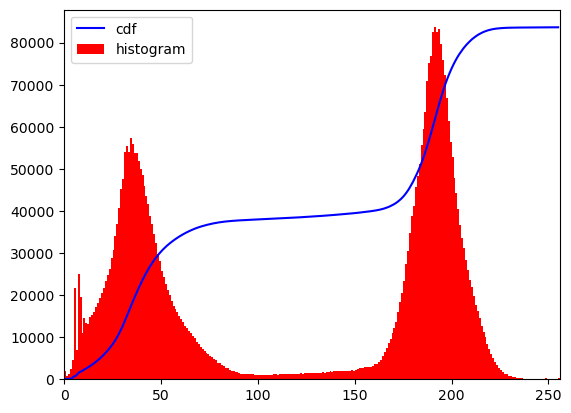

In [599]:
img = cv2.imread("only_checkboard.jpg", cv2.IMREAD_GRAYSCALE )

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
 
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()




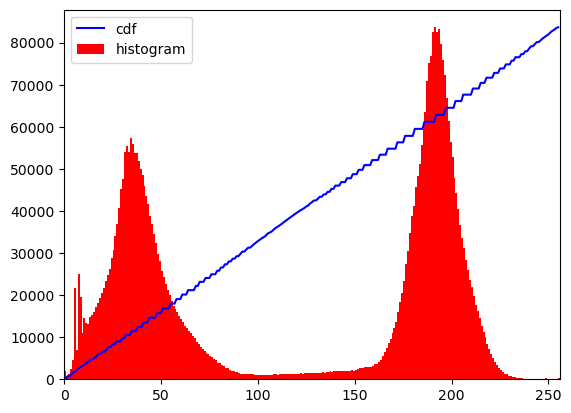

In [600]:
equalized = cv2.equalizeHist(img)


clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_img = clahe.apply(gray)

blurred = cv2.GaussianBlur(enhanced_img , (5, 5), 0)


hist,bins = np.histogram(equalized.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
 
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

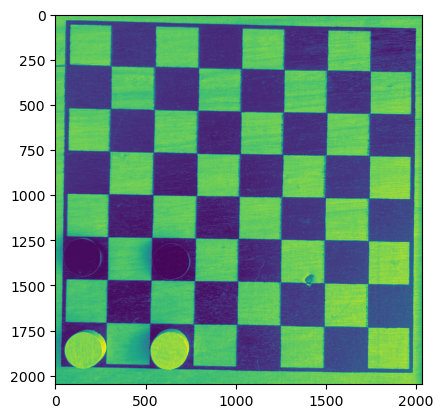

In [601]:
imgBlurred = cv2.GaussianBlur(img, (7, 7), 0)
gray = img # convert to gray
sobelx = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize=3) # sobelX to get the vertical edges
sobely = cv2.Sobel(gray, cv2.CV_8U, 0, 1, ksize=5) # sobelX to get the vertical edges



ret,threshold_img = cv2.threshold(sobelx, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

morph_img_threshold = threshold_img.copy()
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(22, 3))
cv2.morphologyEx(src=threshold_img, op=cv2.MORPH_CLOSE, kernel=element, 
dst=morph_img_threshold)

plt.imshow(img)


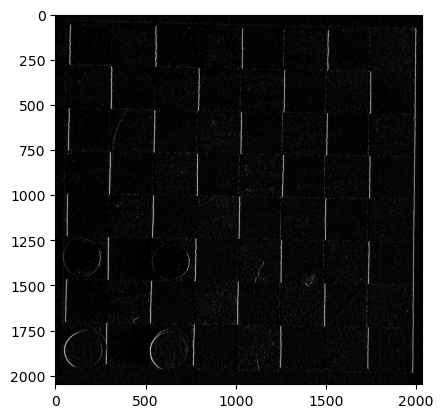

In [602]:
plt.imshow(sobelx, "gray")


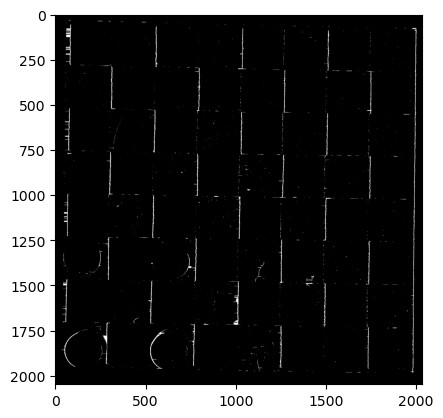

In [603]:
plt.imshow(morph_img_threshold, "gray", )

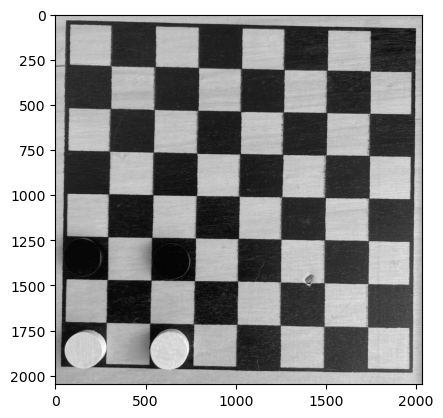

In [604]:
plt.imshow(img, "gray")


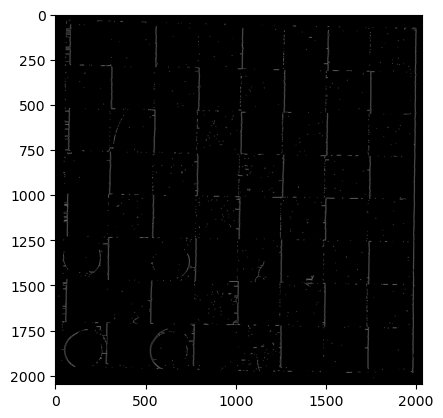

In [605]:
edges = cv2.Canny(morph_img_threshold, 50, 150)
_, ordinary_img = cv2.threshold(edges, 155, 255, cv2.THRESH_BINARY)

plt.imshow(ordinary_img, cmap="gray")



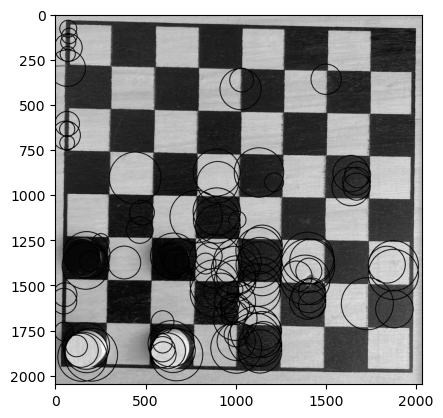

In [606]:
# circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=45, maxRadius=75)
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=40, maxRadius=150)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        # Narysuj okrąg wokół wykrytego pionka
        cv2.circle(img, (x, y), r, (0, 255, 0), 4)

# Pokaż wynik
plt.imshow(img, "gray")